# Laboratorio 07 Matrices

#### Métodos computacionales
#### Universidad de Antioquia
#### Prof:Juan Marcos Marín Ramírez
#### Nombre: Edgar Junior Córdoba Gamboa

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

In [2]:
A = np.array([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

mens = [47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588]
men = np.array(mens).reshape(4,5)
mensaje = men@np.linalg.inv(A)

print(mensaje, mensaje[0,1])

[[ 1. 18.  5. 27. 25.]
 [15. 21. 27.  8.  1.]
 [22.  9. 14.  7. 27.]
 [ 6. 21. 14. 27. 27.]] 18.00000000000006


In [3]:
abe = [' ','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']

mensaje_real = ''
for i in range(np.shape(mensaje)[0]):
  for j in range(np.shape(mensaje)[1]):
    for k in range(len(abe)):
      if abs(mensaje[i,j] -int(mensaje[i,j])) > 0.5:
        s = int(mensaje[i,j]) + 1
      else: s = int(mensaje[i,j])

      if s == k:
        mensaje_real += abe[k]


print(mensaje_real + '?')

ARE YOU HAVING FUN  ?


## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

Los parametros vendran dados por [0.04316983 0.91450531]


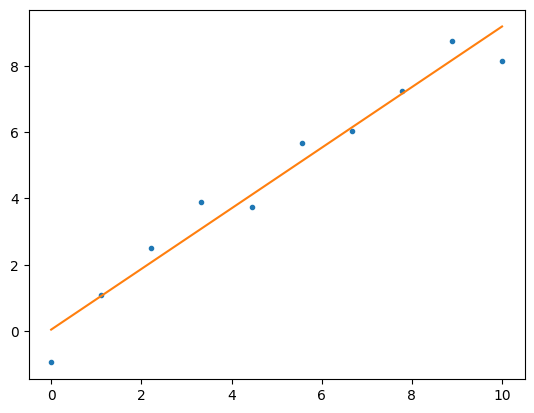

In [4]:
N = 10
x1 = np.linspace(0, 10, N)
uno = np.ones(N)
X = np.vstack((uno,x1))
noise=2*np.random.random(N) - 1
y = 0.9*x1 + noise

prod = (X)@X.T
prod_inv = np.linalg.inv(prod)
theta = prod_inv@X@y

print(f"Los parametros vendran dados por {theta}""")

plt.plot(x1,y,'.')
plt.plot(x1,theta[0] + theta[1]*x1)

In [14]:
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0

X1 = np.vstack((np.ones(N),x1,x2))

X = X1.T
prod = (X.T)@X
prod_inv = np.linalg.pinv(prod)
theta = prod_inv@X.T@y

print(f"Los parametros vendran dados por {theta}""")


Los parametros vendran dados por [ 0.71810235 -0.84979555 -1.6995911 ]


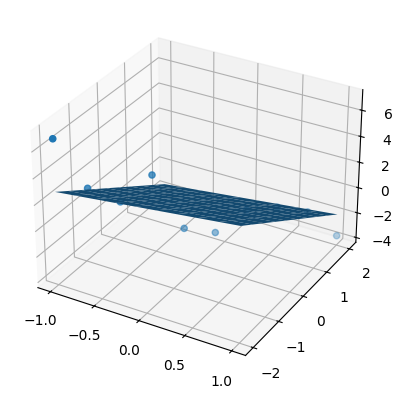

In [6]:
N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = theta[2]*X2 - theta[1]*X1 + theta[0]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
scatter = ax.scatter(x1, x2, y,"-")

## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

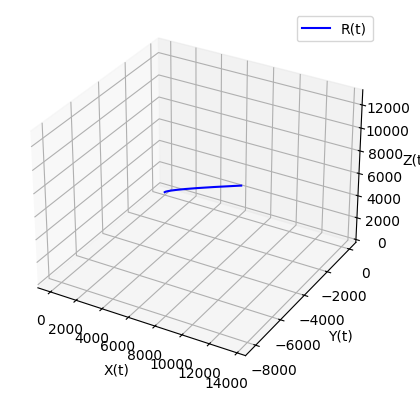

In [7]:
A = np.array([[2,-1,2],
              [0,3,-1],
              [2,1,3]])
# Parametros iniciales
r0 = np.array([1,1,2])

# Valores Propios de la Matriz
val, U = np.linalg.eig(A)

# Matriz diagonal
D = np.diag(val)

# Inversa de la matriz
U_inv = np.linalg.inv(U)
t = np.linspace(0, 2, 100000)

x = np.zeros(100000)
y = np.zeros(100000)
z = np.zeros(100000)
for i in range(len(t)):
  R = (U@np.exp(D*t[i]).T@U_inv)@r0
  x[i] = R[0]
  y[i] = R[1]
  z[i] = R[2]

# Graficamos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, label='R(t)', color='blue')
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.legend()
plt.show()



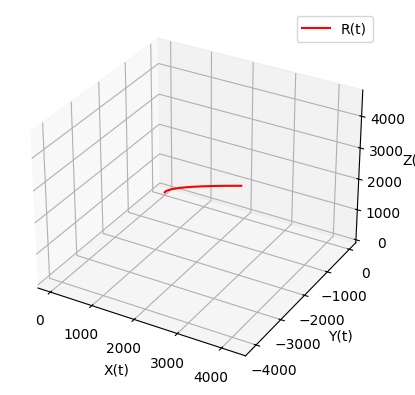

In [8]:
x = lambda t: 0.5 * (r0[0] * (np.exp(2*t) * (1 + np.exp(2*t) - 2*t)) \
                    + r0[1] * (-2 * t * np.exp(2*t)) \
                    + r0[2] * (np.exp(2*t) * (-1 + np.exp(2*t))))

y = lambda t: 0.5 * (r0[0] * (-np.exp(2*t) * (-1 + np.exp(2*t) - 2*t)) \
                    + r0[1] * (2 * (t + 1) * np.exp(2*t)) \
                    + r0[2] * (-np.exp(2*t) * (-1 + np.exp(2*t))))

z = lambda t: 0.5 * (r0[0] * (np.exp(2*t) * (-1 + np.exp(2*t) + 2*t)) \
                    + r0[1] * (2 * t * np.exp(2*t)) \
                    + r0[2] * (np.exp(2*t) * (1 + np.exp(2*t))))
x_lin = x(t)
y_lin = y(t)
z_lin = z(t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_lin, y_lin, z_lin, label='R(t)', color='red')
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.legend()
plt.show()

## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

In [11]:
A = np.array([[0,2],[0.3,0.5]])

# Datos
n = 1000
val, vec = np.linalg.eig(A)
P0 = np.array([0,10])
a = np.linalg.solve(vec,P0)
pn = (val[0]**n)*(a[0]*vec[0])

cociente = pn[0]/pn[1]
print(f"El cociente es {cociente}")

El cociente es 1.0901826711981395


#Punto 5: Sistemas de ecuaciones
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

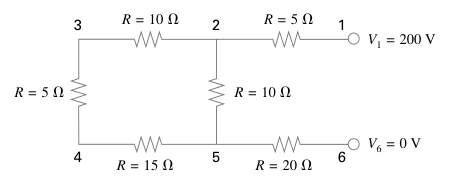

In [17]:
# Resistencias
R12, R23, R34, R45, R25, R56 = 5, 10, 5, 15, 10, 20

# Matriz A y vector b
A = np.array([
    [1, -1, 0, 0, -1, 0],   # Nodo 2: i12 -i23 -i25 =0
    [0, 1, -1, 0, 0, 0],    # Nodo 3: i23 -i34 =0
    [0, 0, 1, -1, 0, 0],    # Nodo 4: i34 -i45 =0
    [0, 0, 0, 1, 1, -1],    # Nodo 5: i45 +i25 -i56 =0
    [5, 0, 0, 0, 10, 20],   # Malla 1: 5i12 +10i25 +20i56 =200
    [0, 3, 0, 0, -1, 0]     # Malla 2: 3i23 -i25 =0
])

b = np.array([0, 0, 0, 0, 200, 0])

# Resolver el sistema
x = np.linalg.solve(A, b)

# Resultados
print(f"I12 = {x[0]:.2f} A")
print(f"I23 = {x[1]:.2f} A")
print(f"I34 = {x[2]:.2f} A")
print(f"I45 = {x[3]:.2f} A")
print(f"I25 = {x[4]:.2f} A")
print(f"I56 = {x[5]:.2f} A")

I12 = 6.15 A
I23 = 1.54 A
I34 = 1.54 A
I45 = 1.54 A
I25 = 4.62 A
I56 = 6.15 A
